# SOK-1006 V24
## Forelesning 2 - Tilbud og etterspørsel

### 1. Markedsetterspørsel

En konsument disponerer inntekt, og velger mellom mange goder og tjenester. Hvor mye av hvert gode som etterpørres avhenger av
- konsumentens preferanser
- prisen på produktet
- konsumentens inntekt
- prisen på andre produkter/tjenester
- offentlig regulering.

Konsumentens etterspørsel etter et produkt viser hva hen er villig til å betale for en ekstra enhet, dvs *marginal betalingsvillighet*. Dette kan vi uttrykke som $$x_{i}^D=D_i(p).$$
Ved å summere over alle (n) konsumenter får vi markedsetterspørsel $$ \sum_{i=1}^{n}x_{i}^D=X^D=D(p).$$

In [1]:
# import pakkene som vi trenger for å tegne en figur
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# Definer Lineær etterspørsel til konsument 1 og 2
# cf fig 3.2 i boka
# x=a - b*p
#Vi setter a_1 = a_2=100, b_1=1, b_2=2



def demand_1(p):
    return 100 - p

def demand_2(p):
    return 100 - 2*p

def m_demand(p):
    w=demand_1(p)
    z=demand_2(p)
    sum = (z<0)*w + (z>=0)*(z+w)

        
    return sum

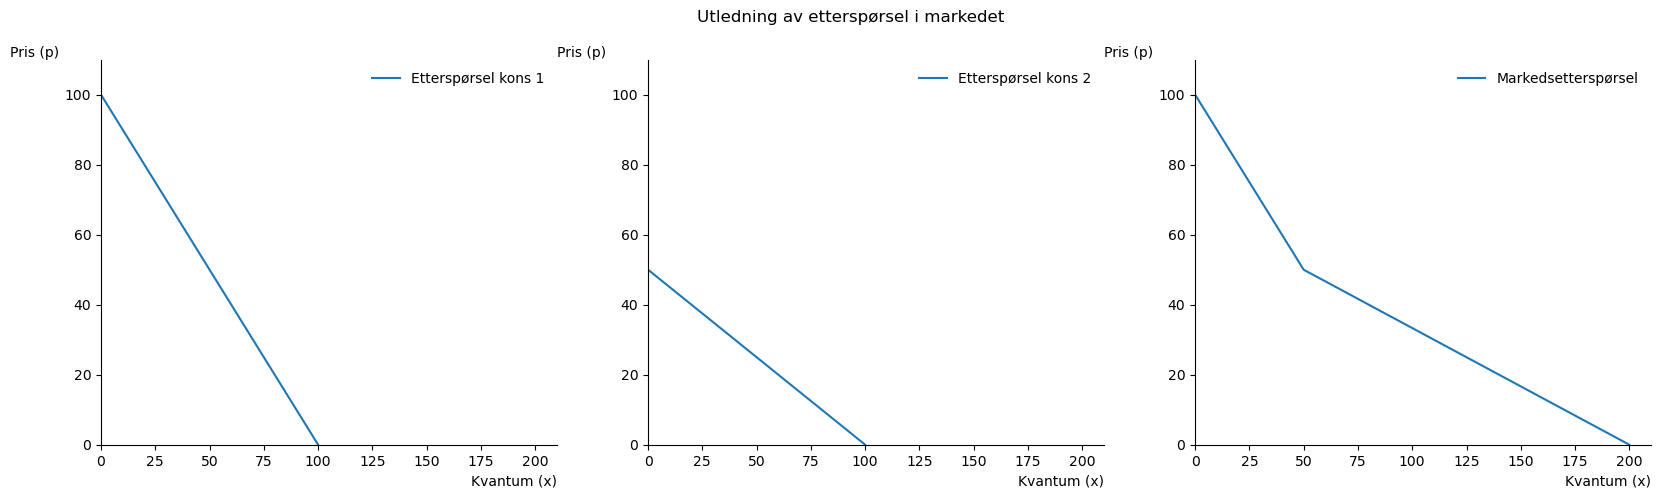

In [3]:
# Tegne individuell etterspørsel og den horisontale summen

p_num = np.linspace(0,110,100)

fig, axs = plt.subplots(1,3, sharey=True, figsize=(20,5))

# plott av linjene

axs[0].plot(demand_1(p_num),p_num,label='Etterspørsel kons 1')
axs[1].plot(demand_2(p_num),p_num,label='Etterspørsel kons 2')
axs[2].plot(m_demand(p_num),p_num,label='Markedsetterspørsel')

# bruk løkke for å tegne aksene

for i in range(3):

    axs[i].set_ylabel('Pris (p)', loc ='top', rotation = 0)
    axs[i].set_xlabel('Kvantum (x)', loc = 'right')
    axs[i].set(ylim=(0,110),xlim=(0,210))
    axs[i].tick_params(labelleft=True)
    axs[i].spines['top'].set_color('none')
    axs[i].spines['right'].set_color('none')
    axs[i].legend(loc='best', frameon=False)

# gi en passende tittel

fig.suptitle('Utledning av etterspørsel i markedet')

plt.show()

Med mange konsumenter vil ikke dette knekkpunktet være så fremtredende, og vi tegner etterspørsel som en jevn funksjon.

### 2. Markedstilbudet

Produsenter kombinerer innsatsfaktorer for å produsere varer eller tjenester. Hvor mye de må ta for å dekke den neste enheten som produseres vil avhenge av
- produksjonskostnader
- teknologien
- offentlige reguleringer.

På samme vis som ovenfor kan vi summere opp tilbudet til hver produsent for å finne markedstilbudet $$ X^S=S(p).$$

Et lineært eksempel er tegnet nedenfor.

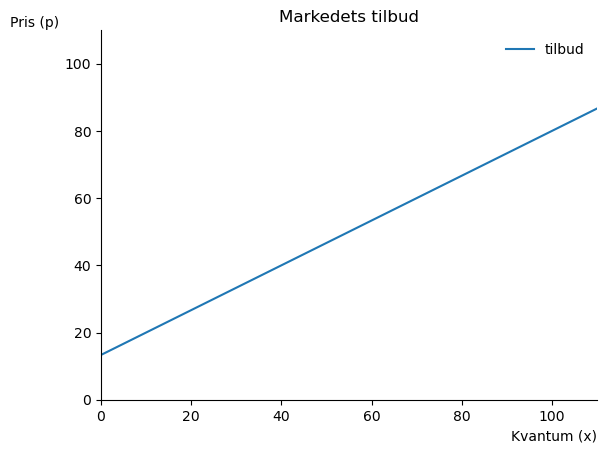

In [4]:
def tilbud(p):
    return -20 + 1.5*p

#lag en akse som vi skal bruke flere ganger

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top', rotation = 0)
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,110))
                ax.set(ylim=(0,110))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(tilbud(p_num),p_num, label='tilbud')


# tittel
ax.set_title('Markedets tilbud')

#vis navnene:
ax.legend(loc='best',frameon=False);




Tilbudet viser hva produsentene må ha for å dekke kostnaden av den siste enheten produsert, dvs produsentens grensekostnad.

### 3: Markedslikevekt

Ved å sette sammen tilbud og etterspørsel får vi en beskrivelse av begge sidene av markedet. Her tegnes et marked med følgende tilbud og etterspørsel:
$$ X^S =-20 + 1.5p \;(tilbud)$$
$$ X^D = 100 - 1.25p \;(etterspørsel).$$

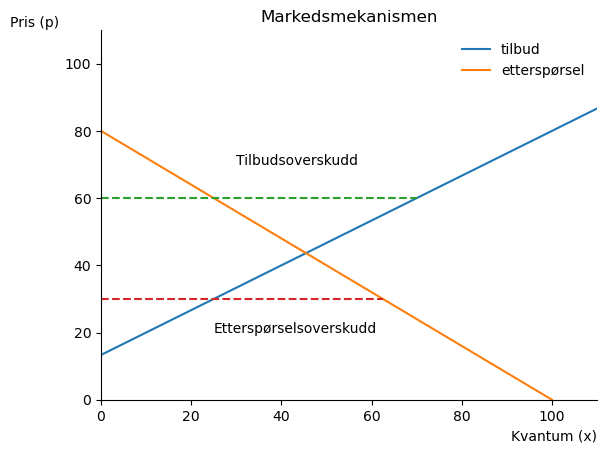

In [5]:

def etters(p):
    return 100 - 1.25*p

fig, ax = create_ax()

ax.plot(tilbud(p_num), p_num ,label='tilbud')
ax.plot(etters(p_num), p_num ,label='etterspørsel')

ax.plot ([0,tilbud(60)], [60,60], linestyle='dashed')
ax.text (30, 70, "Tilbudsoverskudd")

ax.plot ([0,etters(30)], [30,30], linestyle='dashed')
ax.text (25, 20, "Etterspørselsoverskudd")


ax.set_title('Markedsmekanismen')

ax.legend(loc='best', frameon=False);


Figuren viser at når prisen er "for høy" vil produsenter tilby mer enn kjøpere etterspør; er prisen "for lav" vil det være udekket etterspørsel. Det vil alltid være den korte siden av markedet som bestemmer hvor mye som blir omsatt ettersom det er frivillig å kjøpe/selge. I tilfeller med tilbudsoverskudd er omsatt mengde satt av etterspørsel. For å selge mer kan produsenter sette ned prisen litt (og fortsatt få dekket grensekostnaden). Med etterspørselsoverskudd er det tilbudet som begrenser omsetning i markedet. For å være villig til å produsere mer må selgere få bedre betalt, og det er konsumenter som er villige til å betale en høyere pris. Prismekanismen gjør at vi beveger oss mot punktet hvor tilbud og etterspørsel krysser. I dette punktet er markedet dekket - alle som vil kjøpe til rådende pris får kjøpe, og alle som er villig til å selge til denne prisen får solgt. Her er markedets likevekt.

Vi kan løse for denne likevekten. Vi leter etter ett punkt som er både på tilbuds- og etterspørselsfunksjonen, dvs vi må løse likningssettet for p og x. 

In [6]:
import sympy as sp

p, x = sp.symbols('p, x', real=True, positive=True)


eq_s = sp.Eq(-20+1.5*p, x)
eq_d = sp.Eq(100-1.25*p, x)

sol_dict = sp.solve ((eq_s, eq_d), (p,x))

# løsningen er et oppslag (dictionary)
# vi får hver løsning ved å bruke sol_dict[p] og sol_dict[x]
sol_dict

{p: 43.6363636363636, x: 45.4545454545455}

In [7]:
# begrense til to desimalplasser
sol_x = round(sol_dict[x], 2)
sol_p = round(sol_dict[p], 2)

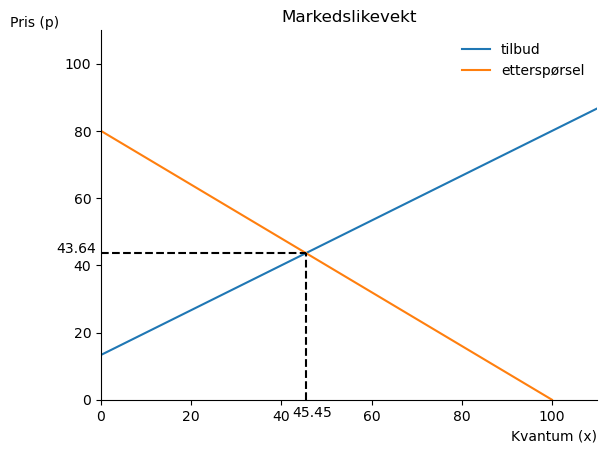

In [8]:
fig, ax = create_ax()


ax.plot(tilbud(p_num), p_num ,label='tilbud')
ax.plot(etters(p_num), p_num ,label='etterspørsel')

# sett inn linjer for likevekten

ax.plot ([0,sol_dict[x]], [sol_dict[p], sol_dict[p]], linestyle='dashed', color='black')
ax.plot ([sol_dict[x], sol_dict[x]], [0, sol_dict[p]], linestyle='dashed', color='black')

#sett inn likevektstall

ax.annotate(sol_x, xy=(sol_dict[x]-3, -5), annotation_clip=False)
ax.annotate(sol_p, xy=(-10, sol_dict[p]), annotation_clip=False)

ax.set_title('Markedslikevekt')

ax.legend(loc='best', frameon=False);

### 4. Skift i tilbud og etterspørsel

Dersom prisen på varen/tjenesten som vi ser på endres beveger vi oss **langs** etterspørsels/tilbudskurven. Dersom andre faktorer endrer seg får vi et **skift** i tilbud eller etterspørsel. Skifter tilbudet til høyre (venstre) vil produsenter tilby mer (mindre) til enhver pris. Likeså for etterspørsel: et skift til høyre (venstre) innebærer en økning (reduksjon) i etterspørsel.
Dersom bedrifter tar i bruk en kostnadsbesparende teknologi, eller prisen på en eller flere innsatsfaktorer faller får vi følgende effekt på markedslikevekten:

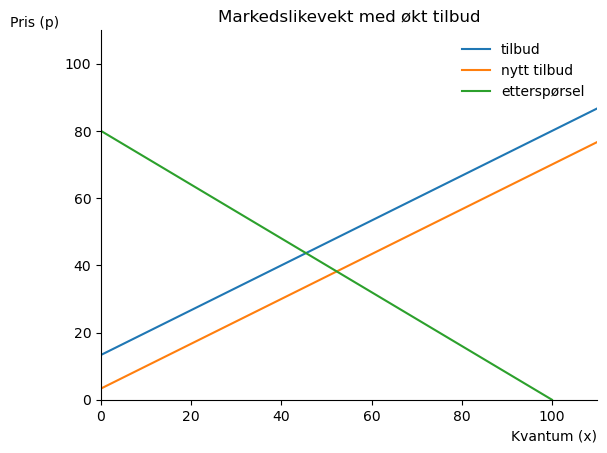

In [9]:
def tilbud_ny(p):
    return -5+1.5*p

fig, ax = create_ax()


ax.plot(tilbud(p_num), p_num ,label='tilbud')
ax.plot(tilbud_ny(p_num), p_num ,label='nytt tilbud')
ax.plot(etters(p_num), p_num ,label='etterspørsel')

ax.set_title('Markedslikevekt med økt tilbud')

ax.legend(loc='best', frameon=False);


Vi ser at dette fører til et fall i likevektsprisen og en økning i omsetning.

Tenk nå at konsumenter får en økning i inntekt eller at prisen på et alternativt gode øker. Da er det nærliggende å tro at etterspørsel etter godet som vi ser på øker:

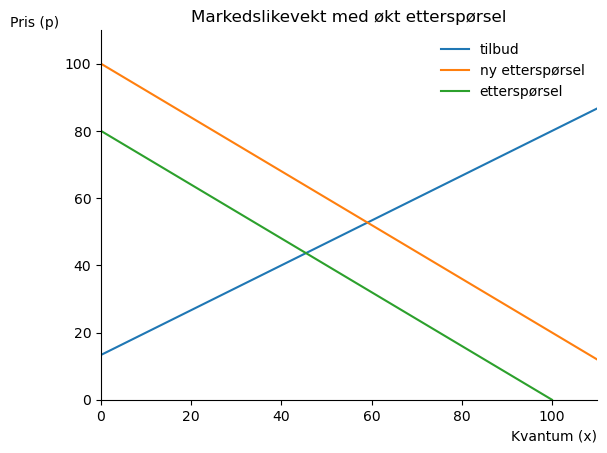

In [10]:
def etters_ny(p):
    return 125-1.25*p

fig, ax = create_ax()

ax.plot(tilbud(p_num), p_num ,label='tilbud')
ax.plot(etters_ny(p_num), p_num ,label='ny etterspørsel')
ax.plot(etters(p_num), p_num ,label='etterspørsel')

ax.set_title('Markedslikevekt med økt etterspørsel')

ax.legend(loc='best', frameon=False);

Vi ser at omsetning øker, men at prisen også øker i dette tilfellet.

### 5. Invers tilbud og etterspørsel

Legg merke til hvordan vi har definert tilbud og etterspørsel: kvantum tilbudt/etterspurt som en funksjon av pris $X^D(p), X^S(p)$. Når vi tegner disse funkjsonene legg merke til at vi har pris på den vertikale og kvantum på den horisontale aksen, dvs vi har tegnet en funksjon $p(X^D), \;p(X^S)$. Disse kalles invers etterspørsel og invers tilbud.

Se igjen på tilbud og etterspørsel som vi brukte tidligere:
$$ X^S =-20 + 1.5p \;(tilbud)$$
$$ X^D = 100 - 1.25p \;(etterspørsel).$$

Vi kan løse hver likning for p for å få invers tilbud og etterspørsel:

In [11]:
# vi kalte disse likningene eq_s og eq_d

inv_s = sp.solve (eq_s, p)
inv_s

[0.666666666666667*x + 13.3333333333333]

In [12]:
inv_d = sp.solve (eq_d, p)
inv_d

[80.0 - 0.8*x]

Da kan vi skrive invers tilbud og etterspørsel som:
$$ p = 13\frac{1}{3}+\frac{2}{3}X^S \;(invers \;tilbud)$$
$$ p = 80 - 0.8X^D \;(invers \;etterspørsel).$$

Her ser vi tydelig at tilbudet treffer p-aksen på $p = 13\frac{1}{3}$, og har konstant helning $\frac{dp}{dX^S} = \frac{2}{3}$. Etterspørsel treffer p-aksen på $p = 80$, og har konstant helning $\frac{dp}{dX^D} = -0.8$.

Vi kan selvsagt plotte invers etterspørsel, men må passe på å sette funksjonen som vi plotter på y-plassen i plot kommandoen:

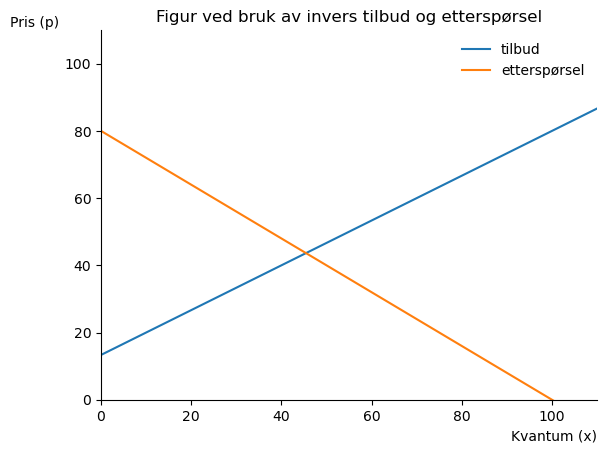

In [13]:
def inv_s(x):
    return 13.33+(2/3)*x

def inv_d(x):
    return 80 - 0.8*x

x_num = np.linspace(0,110,100)

fig, ax = create_ax()

# legg merke til at vi nå definerer verdien på x
# for så å finne p-verdien gjennom de inverse funksjonene

ax.plot(x_num, inv_s(x_num), label='tilbud')
ax.plot(x_num, inv_d(x_num), label='etterspørsel')


ax.set_title('Figur ved bruk av invers tilbud og etterspørsel')

ax.legend(loc='best', frameon=False);

### 6. Oppgave

Et marked har følgende invers tilbud og etterspørsel:
$$ p = A+Bx \;(invers \;tilbud)$$
$$ p = a - bx \;(invers \;etterspørsel).$$
(i) Her er a, b, A, B alle positive tall. Hva viser de?     
(ii) Regn ut markedets likevekt. Finn en betingelse som sikrer at det er positiv omsetning i markedet.     
(iii) Regn ut effekten som endringer i a, b, A, B har på likevekten.     
(iv) Sett in verdier for a, b, A, B og lag en figur som viser markedslikvekten.      
(v) Lag 4 figurer som viser viser effektene som du identifiserte i (iii). Bruk disse figurene til å gi en intuitiv forklaring på dine funn.


In [14]:
# skriv ditt svar her